Dataset Loaded Successfully!


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 171ms/step - accuracy: 0.3030 - loss: 1.8715 - val_accuracy: 0.5231 - val_loss: 1.3222
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 177ms/step - accuracy: 0.5316 - loss: 1.3079 - val_accuracy: 0.6126 - val_loss: 1.1079
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.6203 - loss: 1.0711 - val_accuracy: 0.6681 - val_loss: 0.9541
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 167ms/step - accuracy: 0.6645 - loss: 0.9603 - val_accuracy: 0.6886 - val_loss: 0.9049
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.6957 - loss: 0.8645 - val_accuracy: 0.7174 - val_loss: 0.8302
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7137 - loss: 0.8379

Test Accuracy: 0.7081000208854675


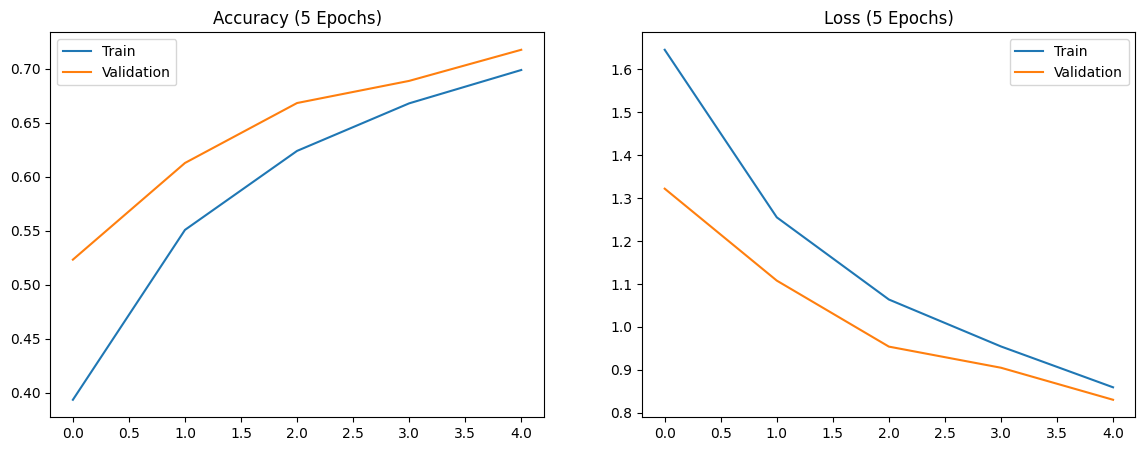

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


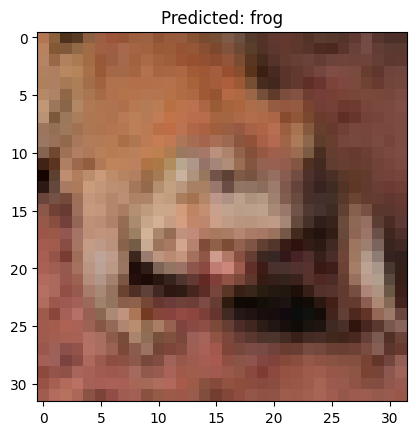

In [4]:
# ---------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ---------------------------------------------
# 2. LOAD CIFAR-10 DATASET
# ---------------------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Class names
class_names = ["airplane", "car", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

print("Dataset Loaded Successfully!")

# ---------------------------------------------
# 3. BUILD CNN MODEL
# ---------------------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# ---------------------------------------------
# 4. COMPILE MODEL
# ---------------------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------------------------------------------
# 5. TRAIN MODEL (Epochs = 5)
# ---------------------------------------------
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# ---------------------------------------------
# 6. EVALUATE MODEL
# ---------------------------------------------
loss, accuracy = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", accuracy)

# ---------------------------------------------
# 7. PLOT ACCURACY & LOSS
# ---------------------------------------------
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy (5 Epochs)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss (5 Epochs)')
plt.legend()
plt.show()

# ---------------------------------------------
# 8. PREDICT A SAMPLE IMAGE
# ---------------------------------------------
import numpy as np
sample_index = 5
sample_image = x_test[sample_index].reshape(1,32,32,3)

prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

plt.imshow(x_test[sample_index])
plt.title("Predicted: " + class_names[predicted_class])
plt.show()
